In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_csv = "CSV_Files/Mouse_metadata.csv"
study_results_csv = "CSV_Files/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
#study_results

In [39]:
combined = pd.merge(study_results,mouse_metadata,  how='left', on='Mouse ID')
combined.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [40]:
mouse_count = combined["Mouse ID"].count()
mouse_count

1893

In [44]:
count_mouse = combined["Mouse ID"].nunique()
count_mouse

249

In [47]:
duplicates = combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [50]:
all_duplicates = combined.loc[combined["Mouse ID"] == "g989"]
all_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [53]:
new_df = combined[combined['Mouse ID'].isin(duplicates)==False]
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [55]:
count_mouse = new_df["Mouse ID"].nunique()
count_mouse

248

In [56]:
combined.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [57]:
mean = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

stats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of mouse tested')

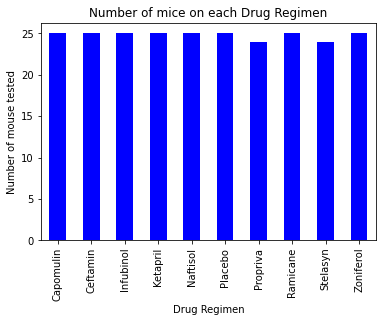

In [60]:
# drug_data = pd.DataFrame(combined.groupby(["Drug Regimen"]).count()).reset_index()
# #drug_data
# drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
# #drugs_df
# drugs_df = drugs_df.set_index("Drug Regimen")
# drugs_df

mice_tested = new_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()
ax = mice_tested.plot(kind="bar",title ="Number of mice on each Drug Regimen",facecolor="b")
ax.set_ylabel("Number of mouse tested")

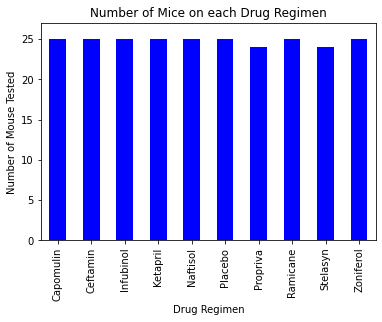

In [66]:
reg = new_df.groupby("Drug Regimen")["Mouse ID"].nunique()
x_axis = np.arange(0, len(reg))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Number of Mice on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Tested")

plt.xlim(-0.5, len(mice_tested)-0.5)
plt.ylim(0,mice_tested.max() +2)

plt.bar(reg.index, reg, facecolor="b",align="center",width=0.5)
plt.xticks(tick_locations, reg.index,rotation="vertical")
plt.show()

In [27]:
gender_df = pd.DataFrame(combined.groupby(["Sex"]).count()).reset_index()
#gender_df.head()

In [ ]:
gender_df = gender_df[["Sex","Mouse ID"]]
#gender_df.head()

In [ ]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1,  autopct='%1.1f%%',
              startangle=175, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=12)

plt.title("Male & Female Mice Percentage")
plt.ylabel("")

In [ ]:
gender_count = (combined.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

In [ ]:
labels = ["Females", "Males"]
colors = ["purple", "orange"]

In [ ]:
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=175)
plt.axis("equal")

In [ ]:
sorted_df = combined.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
#last_df.head().reset_index()

In [ ]:
cap_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
cap_df.head().reset_index()

In [ ]:
cap = cap_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap = cap["Tumor Volume (mm3)"]
cap

In [ ]:
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(cap)
plt.show()

In [ ]:
ram_df = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
#ram_df.head().reset_index()

In [ ]:
ram_obj = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_obj = ram_obj["Tumor Volume (mm3)"]
#ram_obj

In [ ]:
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(cap)
plt.show()

In [ ]:
infu_df = last_df[last_df["Drug Regimen"].isin(["Infubinol"])]
#infu_df.head().reset_index()

In [ ]:
infu_obj = infu_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_obj = infu_obj["Tumor Volume (mm3)"]
infu_obj

In [ ]:
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(cap)
plt.show()

In [ ]:
ceft_df = last_df[last_df["Drug Regimen"].isin(["Ceftamin"])]
#ceft_df.head().reset_index()

In [ ]:
ceft_obj = ceft_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceft_obj = ceft_obj["Tumor Volume (mm3)"]
#ceft_obj

In [ ]:
quartiles = cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

NameError: name 'cap' is not defined

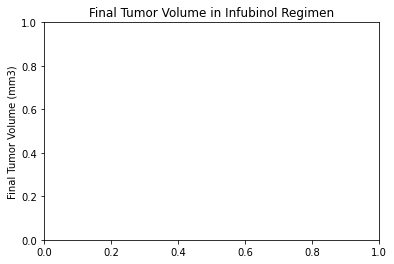

In [12]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(cap)
plt.show()

In [ ]:
capomulin_df = combined.loc[combined["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

In [ ]:
capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capo_mouse

In [ ]:
capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capo_mouse = capo_mouse.reset_index(drop=True)
capo_mouse.set_index("Timepoint").plot(figsize=(10,5), linewidth=2.5, color="red")

In [ ]:
capomulin_df.head()